In [1]:
import numpy as np
import matplotlib.pylab as plt
#%matplotlib inline
import os
import seaborn as sns

import emcee
import corner

from astropy.modeling.models import Voigt1D
import scipy.optimize as op

import sys
sys.path.append('../plotting/')
import spec_helper_functions as shf
import fit_helper_functions as fhf
import old_fit_helper_functions as old_fhf

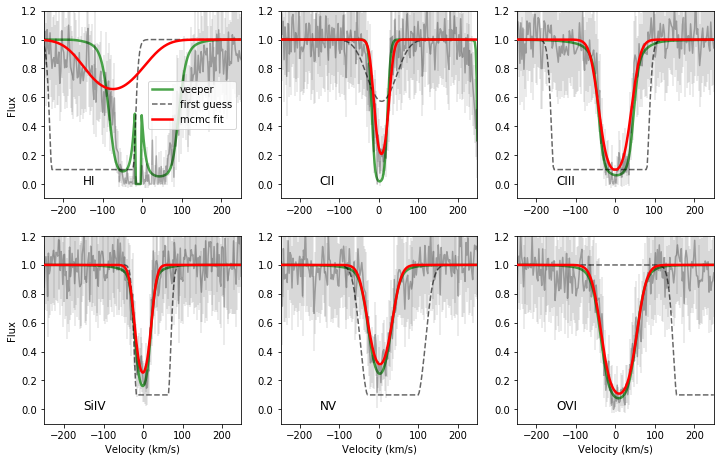

In [2]:
orientation = 'edge_theta0'
orientation = 'face'
model = 'anisd'
radius = 10
ion_list = ['HI', 'CII', 'CIII', 'SiIV', 'NV', 'OVI']
#ion_list = ['NV']
vv_list, flux_list, ferr_list, theta_list = fhf.fit_spectrum(model, orientation, radius, ion_list = ion_list, \
                                    corner_plot = False, use_errors = False, vmin = -250, vmax = 250, sat_lim = 0.05,\
                                    nwalkers = 200, niterations = 1000, plot_veeper = True, save_fit = True)


In [3]:
for theta in theta_list:
    print(theta)

[14.69319839283155, 40.44302254039143, 3.4881056542273563, 13.669602210479095, 67.09595890319224, 8.479120184712345, 0.488246352309588]
[14.062078710745595, 18.91959583469393, 6.428279006031593, 0.18282889983862544]
[13.922923377251077, 36.300398476845615, 0.4641707374511869, 0.2567004982344981]
[13.755846796955355, 21.57355024619734, -0.7170249742689352, 7.504332048248431, 34.972714274157866, 38.63550226479771, 0.13918648706513295]
[9.129912772809373, 36.861671764975576, -90.62387121646857, 14.12529695882563, 34.841823660666044, 2.843633723820573, 0.1471758601858997]
[14.647030221759548, 39.92509924247334, 8.668392502660284, 0.21225436525961705]


In [ ]:
for ion, theta in zip(ion_list, theta_list):
    print(ion, theta)

/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))
/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


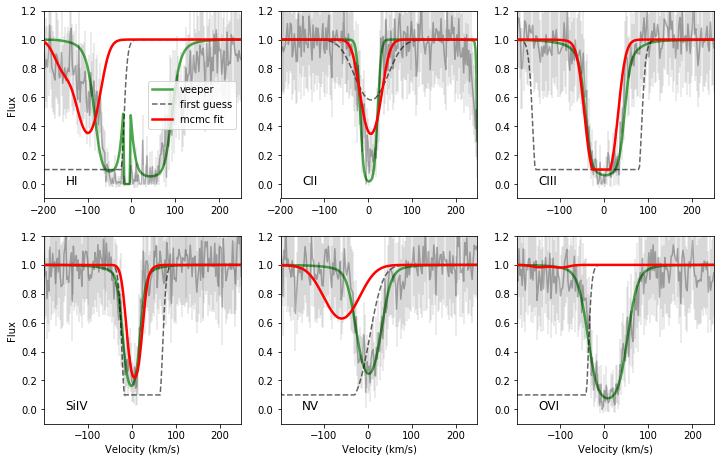

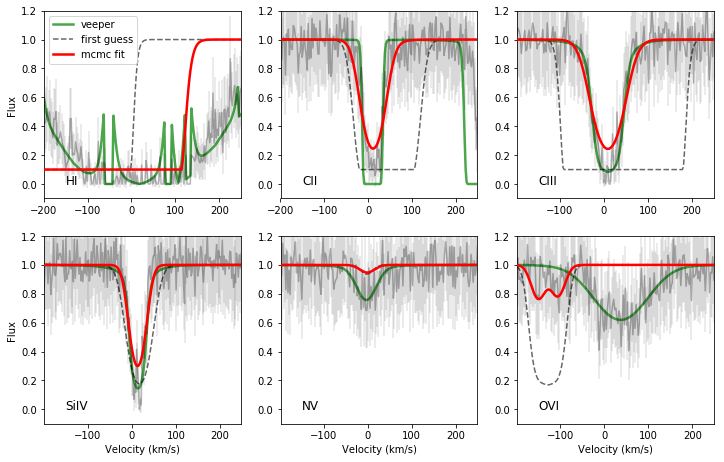

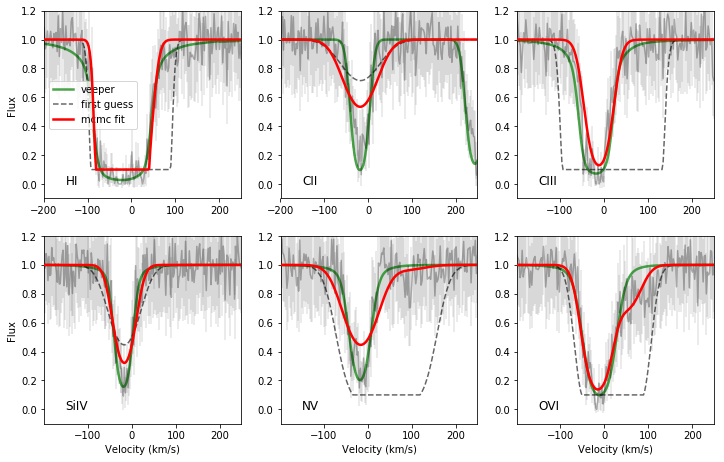

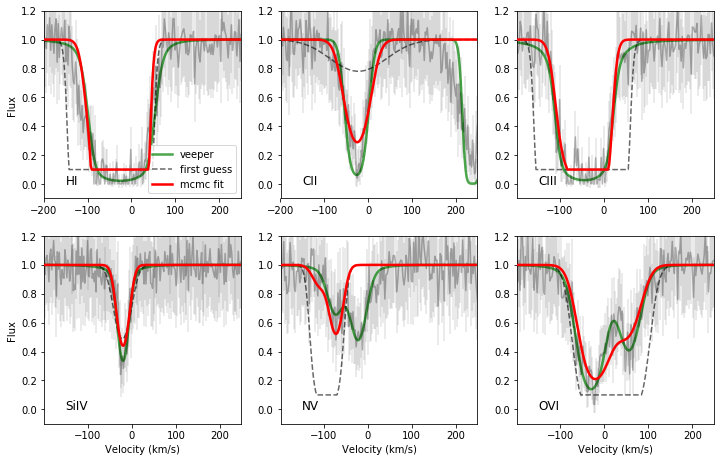

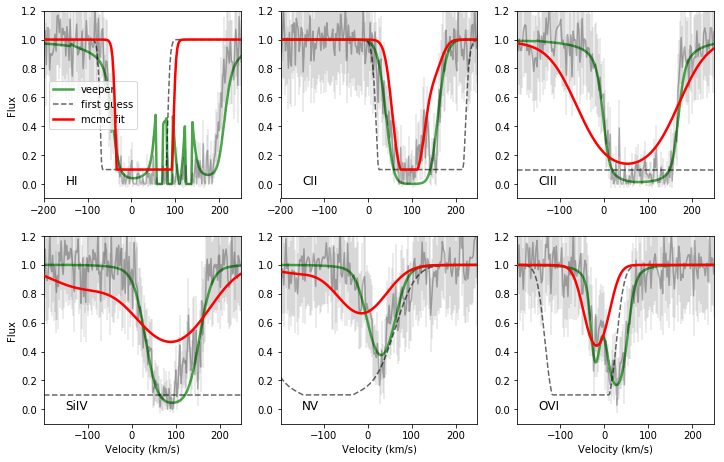

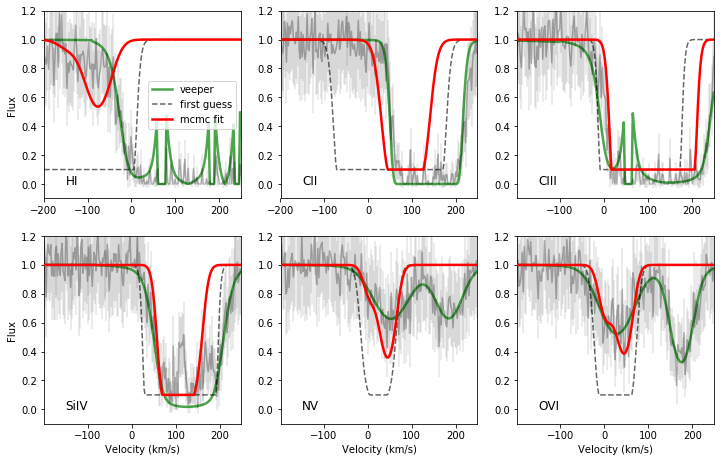

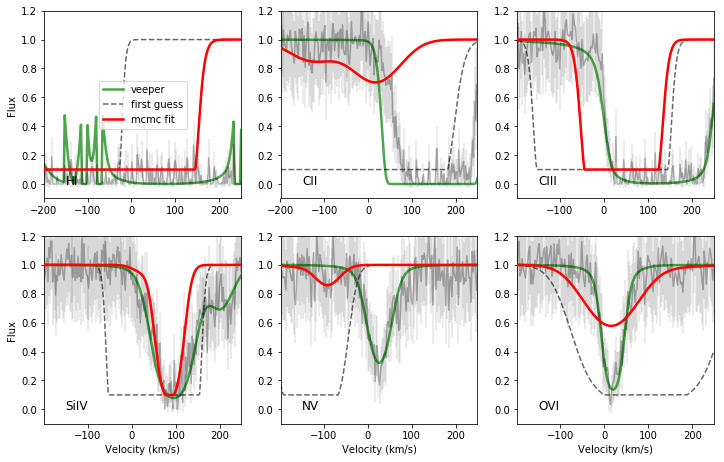

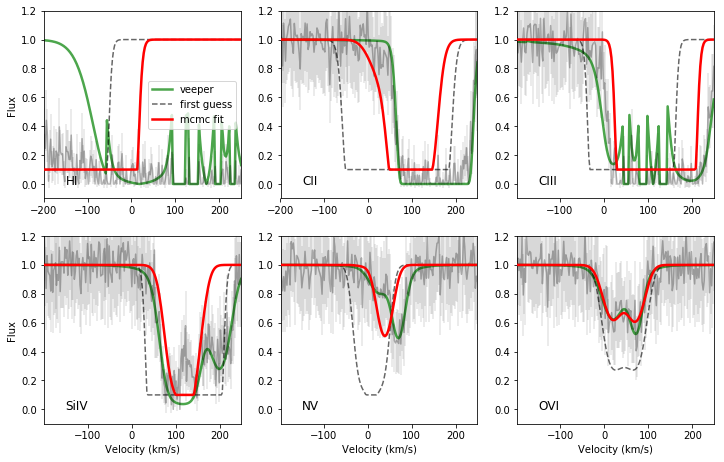

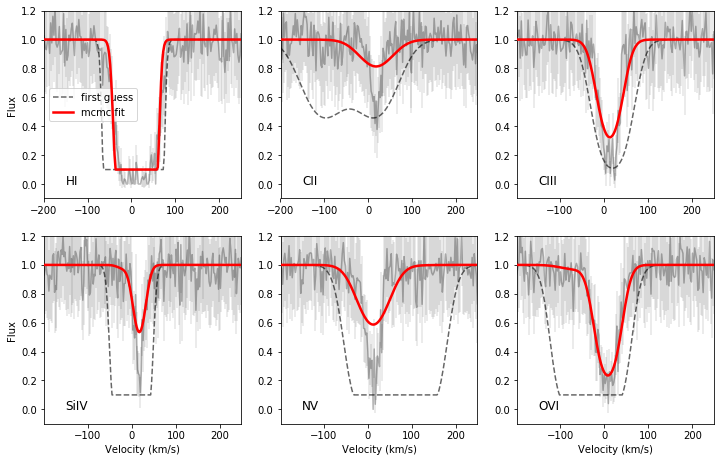

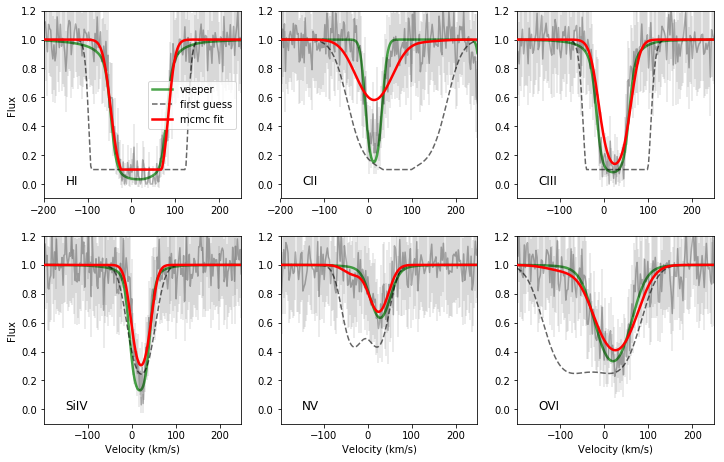

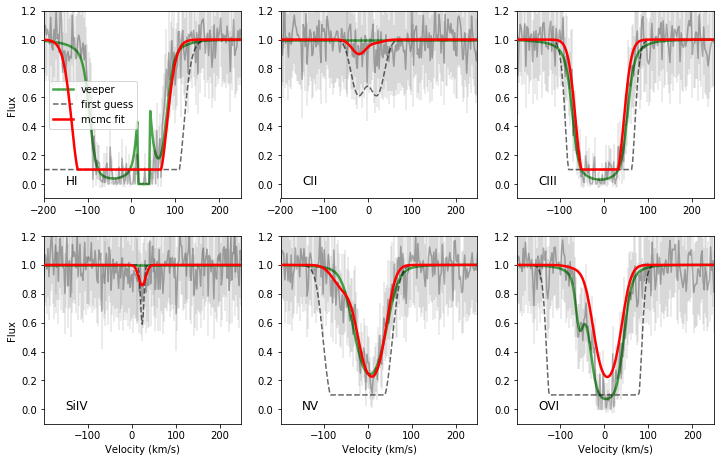

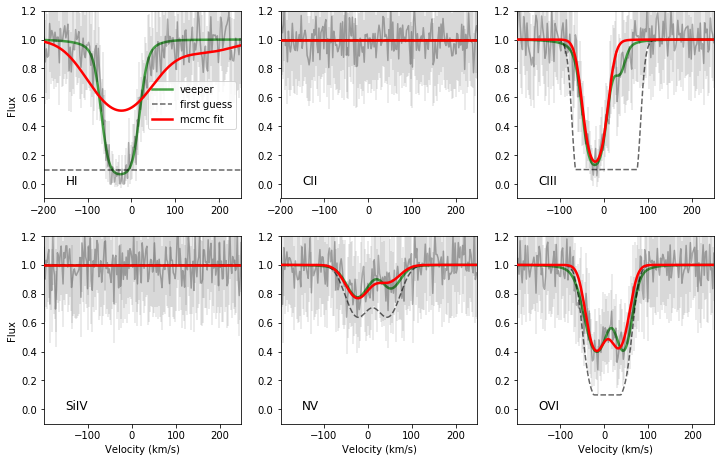

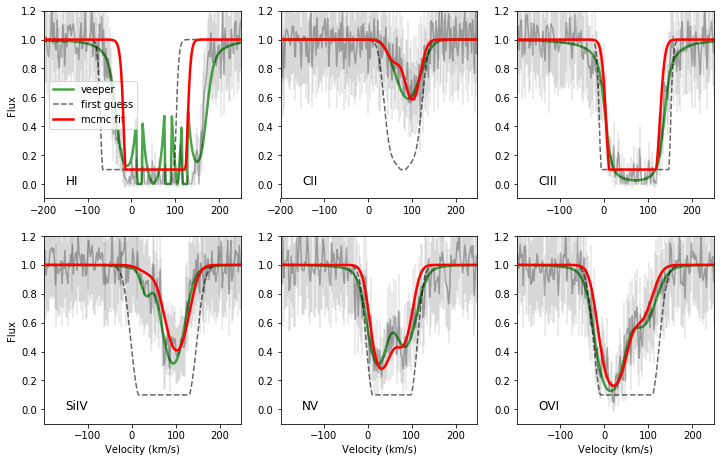

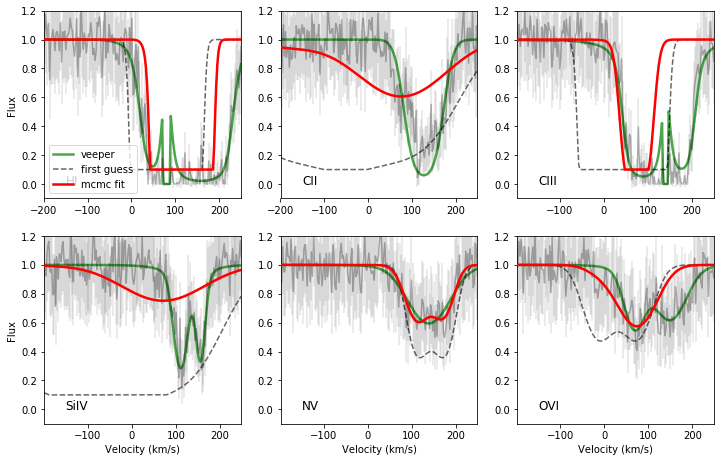

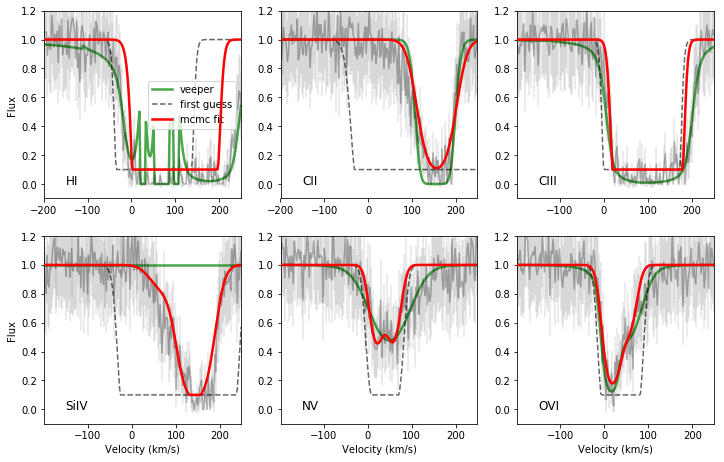

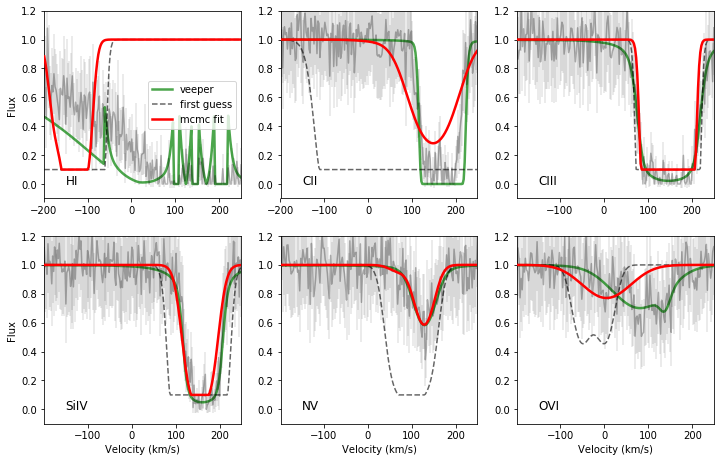

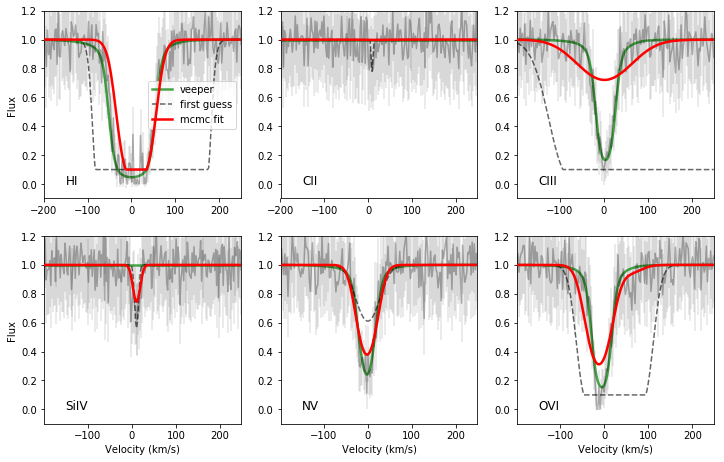

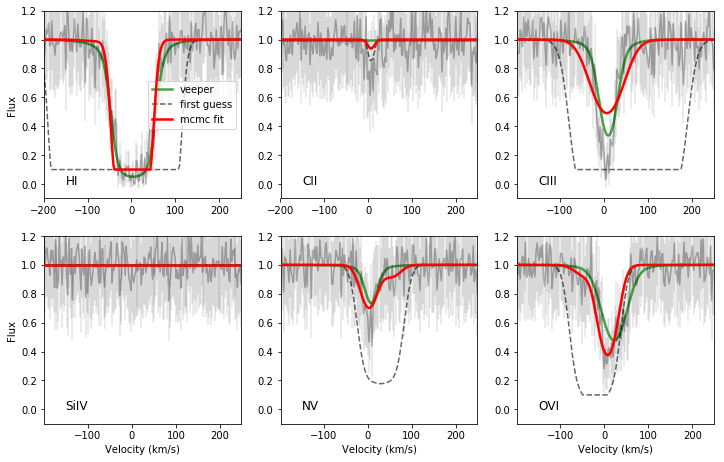

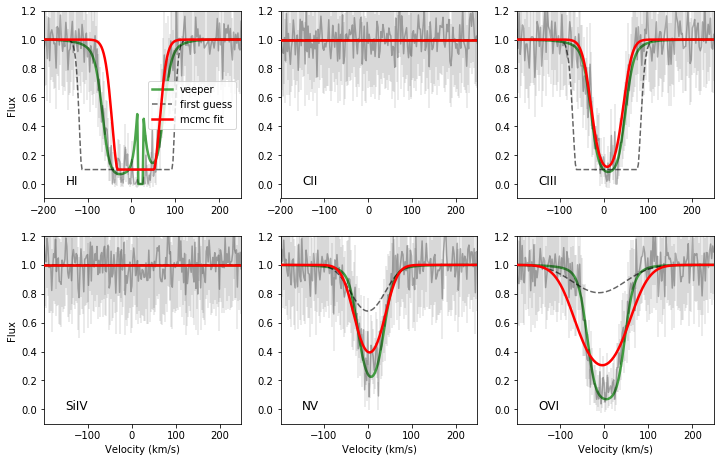

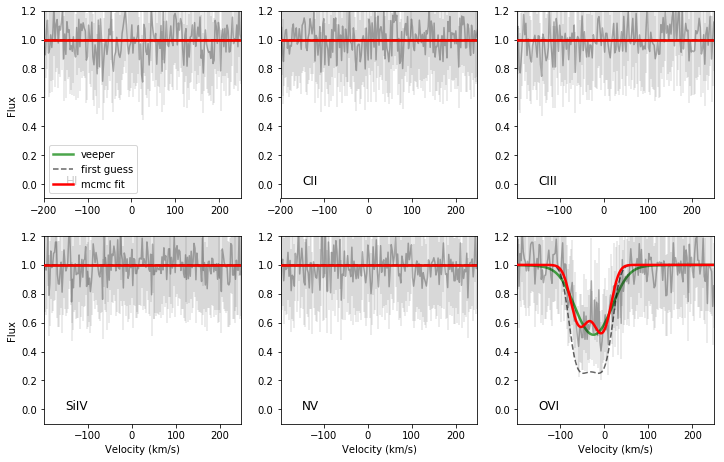

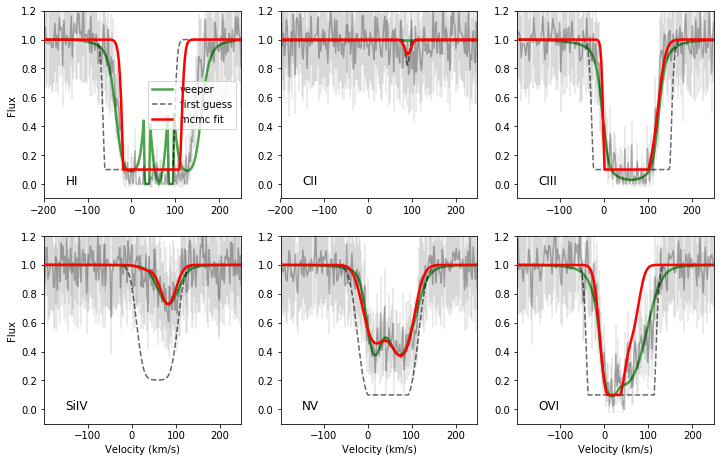

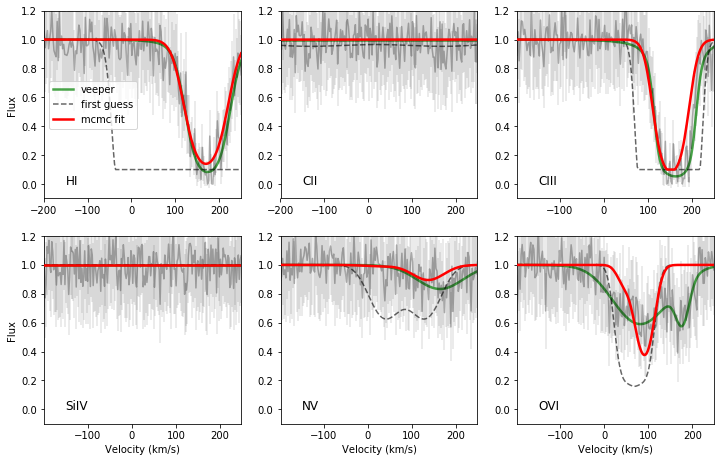

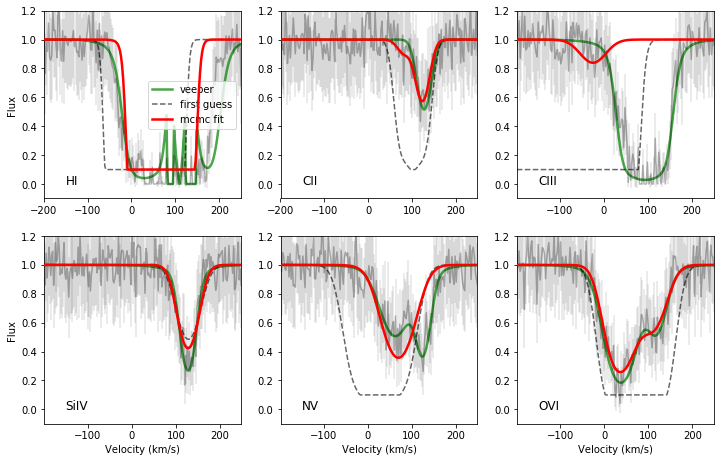

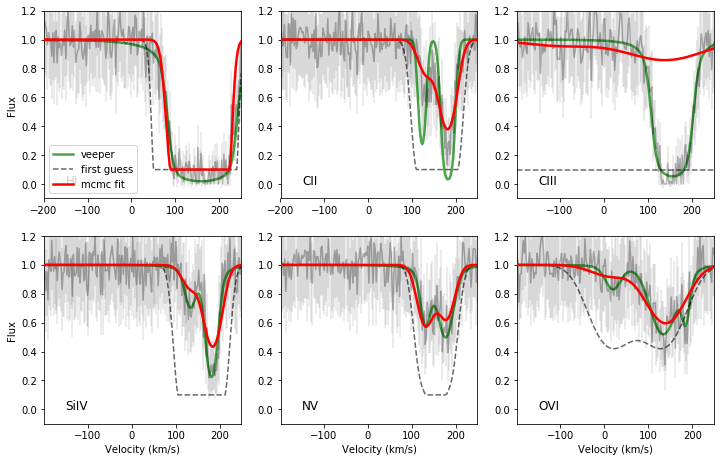

In [4]:
# things to do next time: 
# 1. fix eqwerr; check to see if it flags the same things as "non-detections" in the other workflow
ion_list = ['HI', 'CII', 'CIII', 'SiIV', 'NV', 'OVI']
orientation_list = ['face', 'edge_theta0', 'edge_theta1.0', 'edge_theta1.5']#, 'edge_theta1.5']
model_list = ['anisd', 'stream']
radius_list = np.arange(10, 40, 10)
for radius in radius_list:
    for orientation in orientation_list:
        for model in model_list:
            vv_list, flux_list, ferr_list, theta_list = fhf.fit_spectrum(model, orientation, radius, ion_list = ion_list, \
                                                             use_errors = False, vmin = -200, vmax = 250, \
                                                             nwalkers = 200, niterations = 200)

In [ ]:
ncols = int(len(ion_list) / 2)
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(12, 6))
for ion, vv, flux, ferr, theta in zip(ion_list, vv_list, flux_list, ferr_list, theta_list):
    plot_fit(vv_ion, flux_ion, ferr_ion, theta, ax = ax[row][col], label = ion, color = 'red')

    

In [ ]:
orientation_list = ['edge_theta1.0', 'edge_theta1.5']
model_list = ['stream', 'anisd']
radius_list = np.arange(10, 50, 10)
ion_list = ['H I', 'Mg II', 'C II', 'Si II', 'Si III', 'Si IV', 'N V']
ion_list = ['H I', 'C II', 'Si II', 'Si III', 'Si IV']

#ion_list = ['H I']
for orientation in orientation_list:
    for model in model_list:
        for radius in radius_list:
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
            for ion in ion_list:
                vv, flux, vvfit, fluxfit = load_data(orientation, model, radius, ion)
                ax.plot(vv, flux, color = 'black', alpha = 0.2)
                ax.plot(vvfit, fluxfit, label = ion)
                ax.set_xlim(-200, 400)
                ax.legend()
                plt.savefig('../plots/velocity_%s_%s_%i.png'%(model, orientation, radius))
    